# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [3]:
# Ajustando o modelo de regressão
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Resumo do modelo (visto em aula)
print(reg_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        19:18:53   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.06e-09
Time:                        19:18:53   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

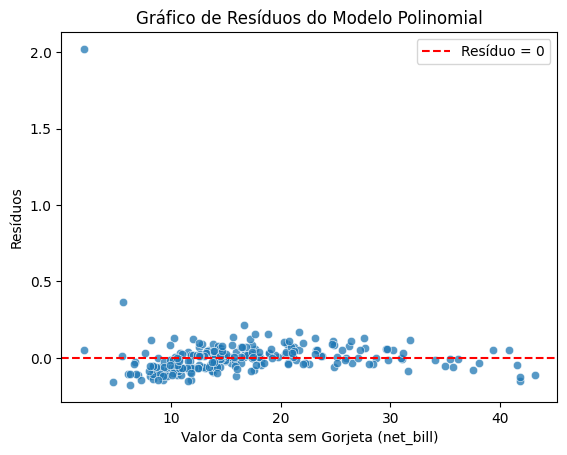

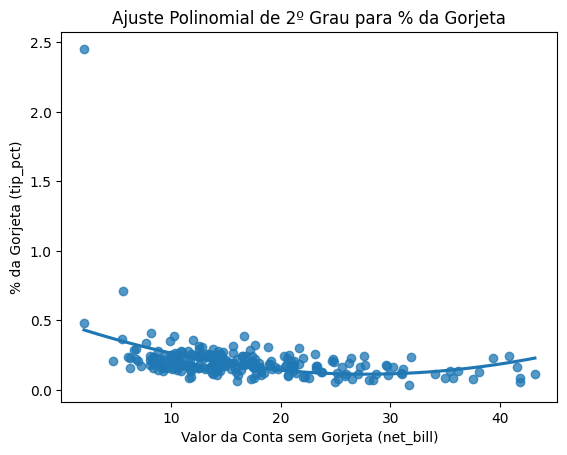

In [4]:
# Ajustando o modelo de regressão com um polinômio de 2º grau
reg_tip_poly = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()

# Resumo do modelo
print(reg_tip_poly.summary())

# Calculando os resíduos
tips['res_poly'] = reg_tip_poly.resid

# Gráfico de resíduos
sns.scatterplot(x='net_bill', y='res_poly', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--', label='Resíduo = 0')
plt.title("Gráfico de Resíduos do Modelo Polinomial")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("Resíduos")
plt.legend()
plt.show()

# Gráfico de dispersão com linha de regressão ajustada (polinômio)
sns.regplot(x='net_bill', y='tip_pct', data=tips, order=2, ci=None, scatter_kws={'alpha': 0.75})
plt.title("Ajuste Polinomial de 2º Grau para % da Gorjeta")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("% da Gorjeta (tip_pct)")
plt.show()


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        19:19:01   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

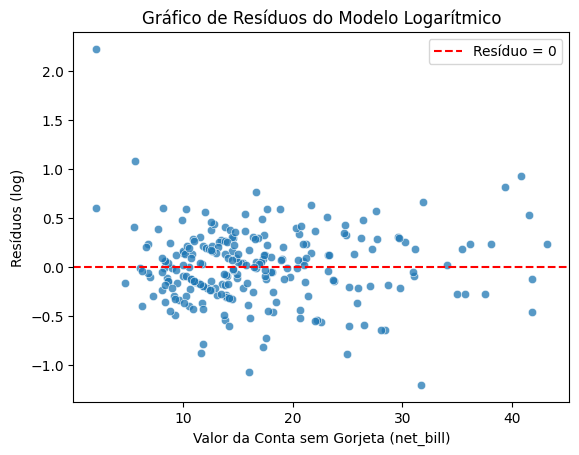

In [5]:
# Ajuste do modelo no log de tip_pct em função de net_bill
reg_log_tip_pct = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()

# Resumo do modelo
print(reg_log_tip_pct.summary())

# Predição do modelo (em escala log)
tips['log_pred'] = reg_log_tip_pct.fittedvalues

# Converte os valores preditos do log para a escala original
tips['tip_pct_pred'] = np.exp(tips['log_pred'])

# Cálculo do R² na escala original de tip_pct
ss_total = np.sum((tips['tip_pct'] - tips['tip_pct'].mean())**2)
ss_residual = np.sum((tips['tip_pct'] - tips['tip_pct_pred'])**2)
r2_tip_pct = 1 - (ss_residual / ss_total)

print(f"R² do modelo (na escala de tip_pct): {r2_tip_pct:.4f}")

# Gráfico de resíduos
tips['res_log'] = reg_log_tip_pct.resid
sns.scatterplot(x='net_bill', y='res_log', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--', label='Resíduo = 0')
plt.title("Gráfico de Resíduos do Modelo Logarítmico")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("Resíduos (log)")
plt.legend()
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        19:19:09   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

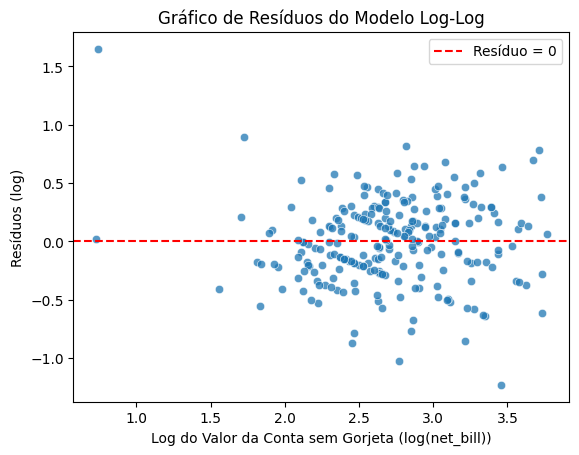

In [6]:
# Ajuste do modelo no log de tip_pct em função do log de net_bill
reg_log_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()

# Resumo do modelo
print(reg_log_log.summary())

# Predição do modelo (em escala log-log)
tips['log_log_pred'] = reg_log_log.fittedvalues

# Converte os valores preditos do log para a escala original
tips['tip_pct_pred'] = np.exp(tips['log_log_pred'])

# Cálculo do R² na escala original de tip_pct
ss_total = np.sum((tips['tip_pct'] - tips['tip_pct'].mean())**2)
ss_residual = np.sum((tips['tip_pct'] - tips['tip_pct_pred'])**2)
r2_tip_pct_loglog = 1 - (ss_residual / ss_total)

print(f"R² do modelo (na escala de tip_pct): {r2_tip_pct_loglog:.4f}")

# Gráfico de resíduos
tips['res_log_log'] = reg_log_log.resid
sns.scatterplot(x=np.log(tips['net_bill']), y=tips['res_log_log'], alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--', label='Resíduo = 0')
plt.title("Gráfico de Resíduos do Modelo Log-Log")
plt.xlabel("Log do Valor da Conta sem Gorjeta (log(net_bill))")
plt.ylabel("Resíduos (log)")
plt.legend()
plt.show()


###  6. qual modelo resultou no melhor ajuste?

O modelo tip_pct∼log(net_bill) apresenta o maior R2 (R2 = 0.916), indicando que é o que melhor ajusta aos dados, pois explica mais de 91% da variação.

